In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

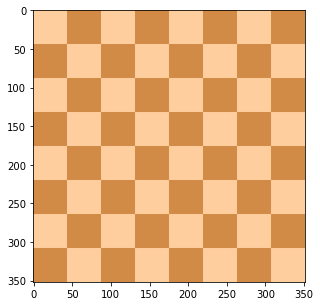

In [81]:
chess_img = cv2.imread("../DATA/flat_chessboard.png")
chesS_img_rgb = cv2.cvtColor(chess_img,cv2.COLOR_BGR2RGB)

display_img(chesS_img_rgb)

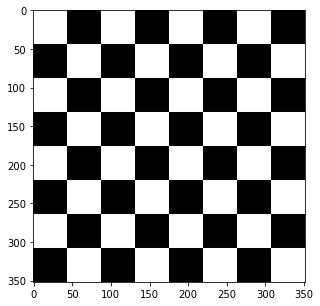

In [82]:
chess_img_gray = cv2.cvtColor(chess_img,cv2.COLOR_BGR2GRAY)

display_img(chess_img_gray,cmap="gray")

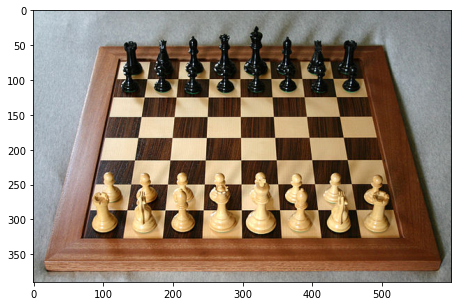

In [83]:
real_chess = cv2.imread("../DATA/real_chessboard.jpg")
real_chess_rgb = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

display_img(real_chess_rgb)

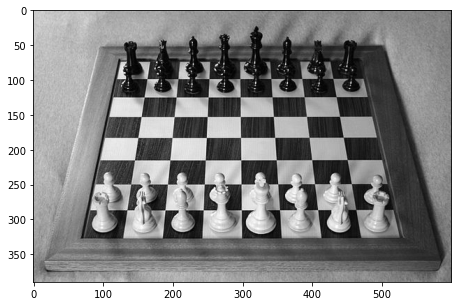

In [84]:
real_chess_gray = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

display_img(real_chess_gray, cmap="gray")

In [85]:
# Convert gray image to float values
gray_flat_chess = np.float32(chess_img_gray)
gray_flat_chess

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [86]:
corner_det = cv2.cornerHarris(gray_flat_chess,blockSize=2,ksize=3,k = 0.04)
np.unique(corner_det)

array([-630118.44, -157529.61,       0.  ,  827030.44,  876258.5 ,
       1230700.1 ], dtype=float32)

In [87]:
corner_det = cv2.dilate(corner_det,None)
corner_det.max()*0.01

12307.001250000001

In [88]:
np.unique(corner_det)

array([-157529.61,       0.  , 1230700.1 ], dtype=float32)

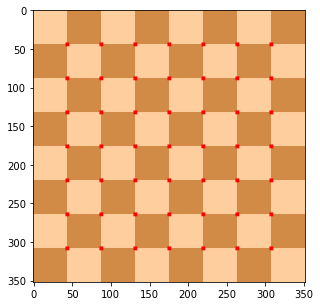

In [89]:
# Whenever the result from the cornerHarris detector is greater than 1% of the max value replace it with red (255,0,0) to show the detected corners
chesS_img_rgb[corner_det>0.01*corner_det.max()] = [255,0,0]

display_img(chesS_img_rgb)

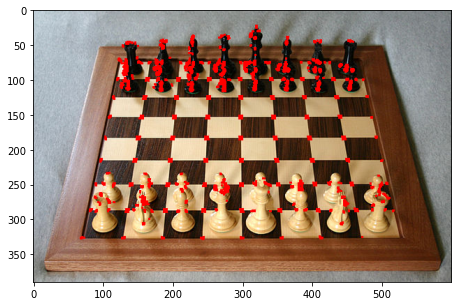

In [91]:
gray_real_chess = np.float32(real_chess_gray)

corner_det = cv2.cornerHarris(gray_real_chess,blockSize=3,ksize=5,k = 0.08)
corner_det = cv2.dilate(corner_det,None)

real_chess_rgb[corner_det>0.01*corner_det.max()] = [255,0,0]

display_img(real_chess_rgb)